In [33]:
for i in range(10):
    if i == 1 or i == 3 or i == 5 or i == 7 or i == 9:
            print('i is odd')
    else:
        print('i is even')

i is even
i is odd
i is even
i is odd
i is even
i is odd
i is even
i is odd
i is even
i is odd


In [34]:
#python3 lint.py badcode.py

In [35]:
import pandas as pd
from pandas import DataFrame, Series

In [24]:
DataFrame([[1,2], [3,4]])

,0,1
0,1,2
1,3,4


In [25]:
DataFrame([{"x":1, "y":2},
           {"x":3, "y":4}])

,x,y
0,1,2
1,3,4


In [26]:
DataFrame({"x":[1,3],
           "y":[2,4]})

,x,y
0,1,2
1,3,4


In [27]:
DataFrame({"x":{"A":1,"B":3},
           "y":{"A":2,"B":4}})

,x,y
A,1,2
B,3,4


In [6]:
import time


In [7]:
time.time()


1575507329.583943

In [9]:
t1 = time.time()

total = 0
limit = 10000 # try changing this
for i in range(limit):
    total += i

t2 = time.time()

print("TOTAL:", total)
milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

TOTAL: 49995000
ms: 8.101463317871094


In [10]:
import requests

In [14]:
t1 = time.time()

r = requests.get("https://tyler.caraza-harter.com/hello.txt")
r.raise_for_status()
data = r.text

t2 = time.time()

milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

ms: 473.05917739868164


In [15]:
t1 = time.time()

f = open("hello.txt", "w", encoding="utf-8")
f.write(data)
f.close()

t2 = time.time()

milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

ms: 4.757404327392578


In [16]:
t1 = time.time()

f = open("hello.txt", encoding="utf-8")
data = f.read()
f.close()

t2 = time.time()

milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

ms: 23.12779426574707


In [20]:
import os

In [21]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    # TODO: Write the code to download the file from URL
    # and save it in `filename`

    return (str(filename) + " created!")

In [22]:
download("hello.html", "https://tyler.caraza-harter.com/hello.html")

'hello.html created!'

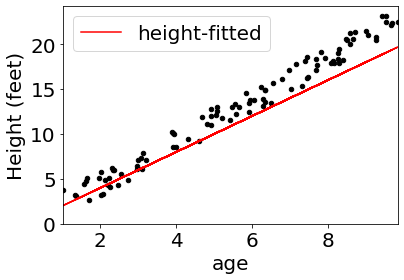

In [41]:
import random

ages = []
heights = []
for i in range(100):
    age = random.uniform(1, 10)
    noise = random.uniform(-1.5, 1.5)
    height = age * 2.3 + noise
    ages.append(age)
    heights.append(height)

trees = DataFrame({"age":ages, "heights":heights})
trees.head()

# tree scatter
import matplotlib
matplotlib.rcParams["font.size"] = 20

ax = trees.plot.scatter(x="age", y="heights", c="black", xlim=0, ylim=0)
ax.set_xlabel("age (year)")
ax.set_ylabel("Height (feet)")

trees["height-fitted"] = trees["age"] * 2
trees.head()

trees.plot.line(ax=ax, x="age", y="height-fitted", color="red")

In [43]:
import numpy as np
np.array([1,2,3,4,5,6,7,8])

array([1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
matrix = np.array([1,2,3,4,5,6,7,8]).reshape(4, 2)
matrix


array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [48]:
matrix[2][1]

6

In [50]:
output = trees["heights"]
trees["one"] = 1
inputs = trees[["age", "one"]]
inputs.head()


,age,one
0,4.299790,1
1,2.977254,1
2,5.842924,1
3,5.649447,1
4,8.488705,1


In [51]:
result = np.linalg.lstsq(inputs, output, rcond=None)
result

(array([ 2.3211381 , -0.03992123]),
 array([76.32981868]),
 2,
 array([62.25523283,  4.10183595]))

In [52]:
slope = result[0][0]
intercept = result[0][1]
slope, intercept

(2.3211381042227086, -0.03992123479933655)

In [53]:
trees["height-fitted"] = trees["age"] * slope + intercept
trees.head()

,age,heights,height-fitted,one
0,4.299790,9.437413,9.940486,1
1,2.977254,6.386682,6.870696,1
2,5.842924,14.546699,13.522313,1
3,5.649447,13.034037,13.073226,1
4,8.488705,20.604804,19.663535,1


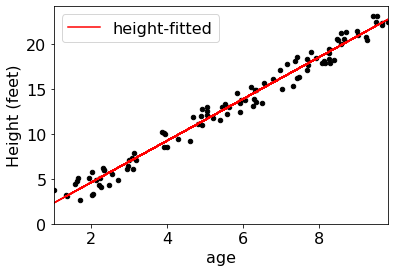

In [54]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

ax = trees.plot.scatter(x="age", y="heights", c="black", xlim=0, ylim=0)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Height (feet)")

trees.plot.line(ax=ax, x="age", y="height-fitted", color="red")